In [1]:
using EISAnalysis

ERROR: Method overwriting is not permitted during Module precompilation. Use `__precompile__(false)` to opt-out of precompilation.


In [2]:
@time randles_circuit = 0.23r-(r-0.025ws^80)/0.2q
@time fullcircuit = EISAnalysis.rebuild(randles_circuit)
# fullcircuit.Z-randles_circuit.Z

  0.657613 seconds (3.07 M allocations: 157.501 MiB, 17.86% gc time, 99.79% compilation time)
  0.299053 seconds (1.38 M allocations: 70.494 MiB, 99.73% compilation time)


Circuit(Real[100000.0, 71968.5673001152, 51794.746792312115, 37275.9372031494, 26826.957952797256, 19306.977288832502, 13894.954943731376, 10000.0, 7196.85673001152, 5179.474679231211  …  0.019306977288832503, 0.013894954943731377, 0.01, 0.007196856730011521, 0.005179474679231211, 0.00372759372031494, 0.002682695795279726, 0.0019306977288832503, 0.0013894954943731376, 0.001], ComplexF64[0.2301120908131481 - 0.00034457598972089233im, 0.2301458745427177 - 0.0004482717939969117im, 0.23018985679989115 - 0.0005831616785524964im, 0.23024712750539214 - 0.0007586213060657271im, 0.23032172048501906 - 0.0009868385585007952im, 0.23041890710777435 - 0.001283653073487312im, 0.2305455848568964 - 0.0016696436182227286im, 0.23071079389462262 - 0.002171534491371294im, 0.23092640768347658 - 0.0028240111704944857im, 0.2312080626883283 - 0.003672058468351965im  …  1.3493634327364348 - 0.14001574728318342im, 1.373321153972509 - 0.16004639903772744im, 1.4010915126623071 - 0.18473982598257563im, 1.4334956334

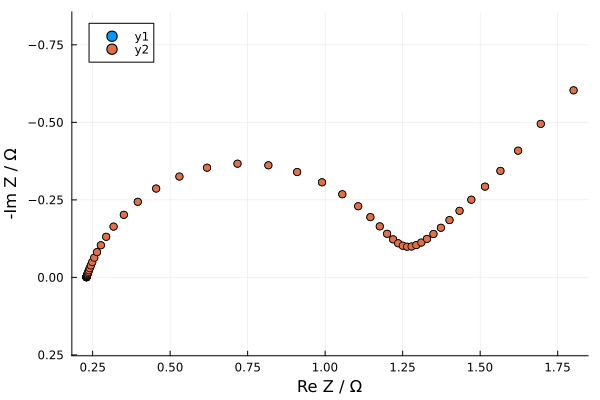

In [3]:
plot_Nyquist(fullcircuit,randles_circuit)

0.23r
r
0.025 * ws ^ 80.0
0.2q
  0.001309 seconds (1.90 k allocations: 74.188 KiB)
Any[:(0.23r), :r, :(0.025 * ws ^ 80.0), :(0.2q)]


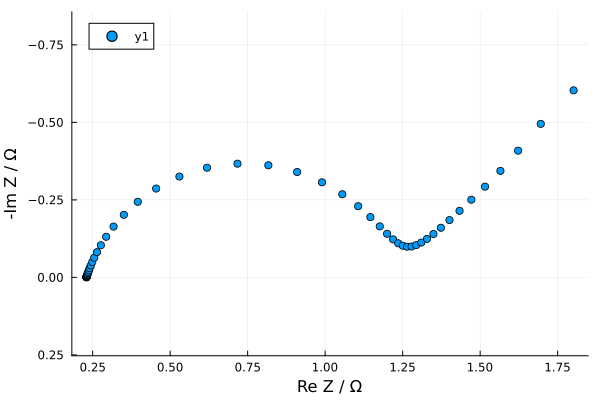

In [ ]:
ω = [1.0,2.0,3.0]
@time fullcircuit = fullcircuit~ω
println(randles_circuit.elements)
plot_Nyquist(fullcircuit,randles_circuit)

In [5]:
fullcircuit.elements

4-element Vector{Any}:
 :(0.23r)
 :r
 :(0.025 * ws ^ 80.0)
 :(0.2q)

In [6]:
randles_circuit.elements

4-element Vector{Any}:
 Resistor(0.23, Real[1.0, 2.0, 3.0], ComplexF64[0.23 + 0.0im, 0.23 + 0.0im, 0.23 + 0.0im], :(0.23r))
 Resistor(1.0, Real[1.0, 2.0, 3.0], ComplexF64[1.0 + 0.0im, 1.0 + 0.0im, 1.0 + 0.0im], :r)
 Warburg("short", 0.025, 80.0, Real[1.0, 2.0, 3.0], ComplexF64[0.01767766952966369 - 0.017677669529663688im, 0.012500000000000002 - 0.0125im, 0.010206207261596576 - 0.010206207261596574im], :(0.025 * ws ^ 80.0))
 CPE(0.2, 0.8, Real[1.0, 2.0, 3.0], ComplexF64[1.1198461662688337 - 3.446532110094411im, 0.6431827245213727 - 1.9795128826549548im, 0.4650090056436363 - 1.4311505613076538im], :(0.2q))

In [18]:
fullcircuit = fullcircuit~ω
eval(fullcircuit.elements[1])

0.23r
r
0.025 * ws ^ 80.0
0.2q
Any[:r, :(0.025 * ws ^ 80.0), :(0.2q), :(0.23r)]


Resistor(0.23, Real[100000.0, 71968.5673001152, 51794.746792312115, 37275.9372031494, 26826.957952797256, 19306.977288832502, 13894.954943731376, 10000.0, 7196.85673001152, 5179.474679231211  …  0.019306977288832503, 0.013894954943731377, 0.01, 0.007196856730011521, 0.005179474679231211, 0.00372759372031494, 0.002682695795279726, 0.0019306977288832503, 0.0013894954943731376, 0.001], ComplexF64[0.23 + 0.0im, 0.23 + 0.0im, 0.23 + 0.0im, 0.23 + 0.0im, 0.23 + 0.0im, 0.23 + 0.0im, 0.23 + 0.0im, 0.23 + 0.0im, 0.23 + 0.0im, 0.23 + 0.0im  …  0.23 + 0.0im, 0.23 + 0.0im, 0.23 + 0.0im, 0.23 + 0.0im, 0.23 + 0.0im, 0.23 + 0.0im, 0.23 + 0.0im, 0.23 + 0.0im, 0.23 + 0.0im, 0.23 + 0.0im], :(0.23r))

In [ ]:
get_params(a::Resistor) = a.R
get_params(a::Capacitor) = a.C
get_params(a::Inductor) = a.L
get_params(a::CPE) = (a.Q,a.n)
get_params(a::Warburg) = (a.A,a.B)

set_params(a::Resistor,p) = p*a
set_params(a::Capacitor,p) = p*a
set_params(a::Inductor,p) = p*a
set_params(a::CPE,p) = p[1]*a^p[2]
set_params(a::Warburg,p) = p[1]*a^p[2]

In [17]:
a = [1,2,3,4]
function y(x)
    for i in x
        i+=1
    end
    return x
end
y(a)
a

4-element Vector{Int64}:
 1
 2
 3
 4

In [5]:
a  = [1,2,3,4]
b  =copy(a)
b

4-element Vector{Int64}:
 1
 2
 3
 4

In [6]:
copy(r)

MethodError: MethodError: no method matching copy(::Resistor)
The function `copy` exists, but no method is defined for this combination of argument types.

Closest candidates are:
  copy(!Matched::DataStructures.SparseIntSet)
   @ DataStructures ~/.julia/packages/DataStructures/95DJa/src/sparse_int_set.jl:28
  copy(!Matched::BitSet)
   @ Base bitset.jl:48
  copy(!Matched::LinearAlgebra.Adjoint{Bool, BitMatrix})
   @ LinearAlgebra ~/.julia/juliaup/julia-1.11.3+0.aarch64.apple.darwin14/share/julia/stdlib/v1.11/LinearAlgebra/src/bitarray.jl:239
  ...
